In [636]:
import numpy as np
import matplotlib.pyplot as plt

In [637]:
def TridiagMatrixAlg(a, b, c, d, N):
	y = np.array([0.] * N)

	for i in range(1, N):
		xi = a[i] / b[i - 1]
		a[i] = 0
		b[i] -= xi * c[i - 1]
		d[i] -= xi * d[i - 1]

	y[N - 1] = d[N - 1] / b[N - 1]

	for i in range(N - 2, -1, -1):
		y[i] = 1 / b[i] * (d[i] - c[i] * y[i + 1])

	return y

In [638]:
U = lambda x: x ** 2 / 2

In [639]:
def A(x, N):
	h = x[1] - x[0]
	a = np.array([-1. / (2 * h ** 2)] * N)
	c = np.copy(a)
	a[0] = 0
	c[N - 1] = 0
	b = 1. / h ** 2 + U(x)
	return a, b, c

In [640]:
def Orthogonalization(psi_next, psi_prevs):
	for psi in psi_prevs:
		psi_next -= psi * (np.inner(psi_next, psi)) / np.linalg.norm(psi)

In [641]:
def InverseIterations(psi0, x, N, iteration, levels):
	energies = []
	psi_list = []
	a, b, c = A(x, N)
	for m in range(0, levels):
		psi_next = psi0.copy()
		for k in range(0, iteration):
			psi_prev = psi_next
			psi_next = TridiagMatrixAlg(np.copy(a), np.copy(b), np.copy(c), np.copy(psi_next), N)
			Orthogonalization(psi_next, psi_list)

		energyLevel = np.linalg.norm(psi_prev) / np.linalg.norm(psi_next)
		energies.append(energyLevel)
		psi_next /= np.linalg.norm(psi_next)
		psi_list.append(psi_next)

	return energies, psi_list

E0: 0.49998747464865234
E1: 1.499937513423197
E2: 2.499836999510857


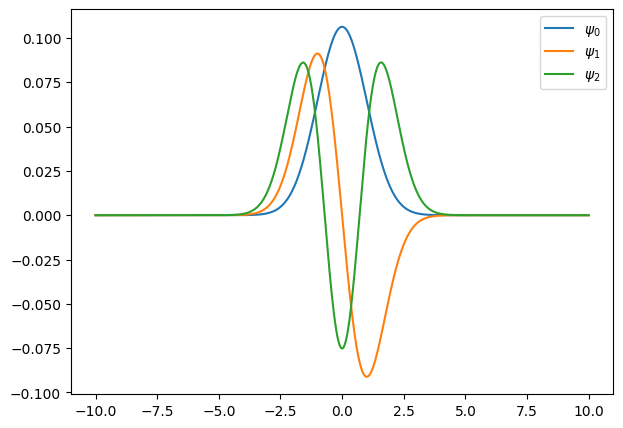

In [642]:
N = 1000
iteration = 20
(x1, x2) = (-10, 10)
levels = 3
x = np.linspace(x1, x2, N)
psi0 = np.random.RandomState(2).random_sample(x.shape)

E, psi = InverseIterations(psi0, x, N, iteration, levels)

plt.figure(figsize=(7, 5), dpi=100)

for i in range(0, levels):
	print(str.format('E{}: {}', i, E[i]))
	plt.plot(x, psi[i],label=f'$\psi_{i}$')
plt.legend()
plt.show()